# Transformers

In [1]:
import os
import sys

# os.chdir("..")
sys.path.append(os.getcwd())
os.getcwd()

'/scratch/pmc026/nchoong/run_conda/509073'

In [2]:
from transformer.pytorch.main_no_embed import main
from transformer.pytorch.utils.plots import plot_metrics
from transformer.pytorch.utils.load_dataloader import load_dataloader

2024-09-29 21:46:45.912998: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-29 21:46:45.955606: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-29 21:46:45.976685: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-29 21:46:45.983006: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-29 21:46:46.008609: I tensorflow/core/platform/cpu_feature_guar

2024-09-29 21:46:50.346399: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Please first ``pip install -U qiskit`` to enable related functionality in translation module


In [3]:
from config import dev

dev

device(type='cuda')

In [4]:
import random
import numpy as np
import torch
import tensorflow as tf

In [5]:
seed = 42

os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

os.environ["OMP_NUM_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTEROP_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTRAOP_THREADS"] = str(os.cpu_count())

tf.config.threading.set_intra_op_parallelism_threads(os.cpu_count())
tf.config.threading.set_inter_op_parallelism_threads(os.cpu_count())

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [6]:
train_dataloader, val_dataloader, test_dataloader = load_dataloader(
    "yelp", sample_size=100_000
)

Loading train tensors:   0%|          | 0/146 [00:00<?, ?it/s]

Loading train tensors:   1%|          | 1/146 [00:03<08:03,  3.33s/it]

Loading train tensors:   1%|▏         | 2/146 [00:06<07:59,  3.33s/it]

Loading train tensors:   2%|▏         | 3/146 [00:09<07:47,  3.27s/it]

Loading train tensors:   3%|▎         | 4/146 [00:13<07:51,  3.32s/it]

Loading train tensors:   3%|▎         | 5/146 [00:16<07:35,  3.23s/it]

Loading train tensors:   4%|▍         | 6/146 [00:19<07:29,  3.21s/it]

Loading train tensors:   5%|▍         | 7/146 [00:22<07:21,  3.17s/it]

Loading train tensors:   5%|▌         | 8/146 [00:25<07:10,  3.12s/it]

Loading train tensors:   6%|▌         | 9/146 [00:28<07:16,  3.19s/it]

Loading train tensors:   7%|▋         | 10/146 [00:32<07:11,  3.17s/it]

Loading train tensors:   8%|▊         | 11/146 [00:35<07:05,  3.15s/it]

Loading train tensors:   8%|▊         | 12/146 [00:38<07:05,  3.17s/it]

Loading train tensors:   9%|▉         | 13/146 [00:41<06:57,  3.14s/it]

Loading train tensors:  10%|▉         | 14/146 [00:44<07:01,  3.19s/it]

Loading train tensors:  10%|█         | 15/146 [00:47<06:48,  3.12s/it]

Loading train tensors:  11%|█         | 16/146 [00:50<06:42,  3.10s/it]

Loading train tensors:  12%|█▏        | 17/146 [00:53<06:35,  3.06s/it]

Loading train tensors:  12%|█▏        | 18/146 [00:56<06:24,  3.00s/it]

Loading train tensors:  13%|█▎        | 19/146 [00:59<06:28,  3.06s/it]

Loading train tensors:  14%|█▎        | 20/146 [01:02<06:17,  3.00s/it]

Loading train tensors:  14%|█▍        | 21/146 [01:05<06:18,  3.03s/it]

Loading train tensors:  15%|█▌        | 22/146 [01:08<06:13,  3.01s/it]

Loading train tensors:  16%|█▌        | 23/146 [01:11<06:05,  2.97s/it]

Loading train tensors:  16%|█▋        | 24/146 [01:14<06:06,  3.01s/it]

Loading train tensors:  17%|█▋        | 25/146 [01:17<05:57,  2.95s/it]

Loading train tensors:  18%|█▊        | 26/146 [01:20<06:00,  3.00s/it]

Loading train tensors:  18%|█▊        | 27/146 [01:23<05:53,  2.97s/it]

Loading train tensors:  19%|█▉        | 28/146 [01:26<05:53,  3.00s/it]

Loading train tensors:  20%|█▉        | 29/146 [01:29<05:51,  3.00s/it]

Loading train tensors:  21%|██        | 30/146 [01:32<05:46,  2.98s/it]

Loading train tensors:  21%|██        | 31/146 [01:35<05:46,  3.01s/it]

Loading train tensors:  22%|██▏       | 32/146 [01:38<05:38,  2.97s/it]

Loading train tensors:  23%|██▎       | 33/146 [01:41<05:37,  2.99s/it]

Loading train tensors:  23%|██▎       | 34/146 [01:44<05:39,  3.03s/it]

Loading train tensors:  24%|██▍       | 35/146 [01:47<05:34,  3.01s/it]

Loading train tensors:  25%|██▍       | 36/146 [01:50<05:31,  3.02s/it]

Loading train tensors:  25%|██▌       | 37/146 [01:53<05:31,  3.04s/it]

Loading train tensors:  26%|██▌       | 38/146 [01:56<05:30,  3.06s/it]

Loading train tensors:  27%|██▋       | 39/146 [02:00<05:31,  3.09s/it]

Loading train tensors:  27%|██▋       | 40/146 [02:03<05:34,  3.16s/it]

Loading train tensors:  28%|██▊       | 41/146 [02:06<05:31,  3.16s/it]

Loading train tensors:  29%|██▉       | 42/146 [02:09<05:21,  3.09s/it]

Loading train tensors:  29%|██▉       | 43/146 [02:12<05:19,  3.10s/it]

Loading train tensors:  30%|███       | 44/146 [02:15<05:13,  3.07s/it]

Loading train tensors:  31%|███       | 45/146 [02:18<05:20,  3.18s/it]

Loading train tensors:  32%|███▏      | 46/146 [02:21<05:11,  3.11s/it]

Loading train tensors:  32%|███▏      | 47/146 [02:25<05:10,  3.14s/it]

Loading train tensors:  33%|███▎      | 48/146 [02:28<05:01,  3.08s/it]

Loading train tensors:  34%|███▎      | 49/146 [02:31<05:00,  3.10s/it]

Loading train tensors:  34%|███▍      | 50/146 [02:34<05:00,  3.13s/it]

Loading train tensors:  35%|███▍      | 51/146 [02:37<04:59,  3.16s/it]

Loading train tensors:  36%|███▌      | 52/146 [02:40<04:50,  3.09s/it]

Loading train tensors:  36%|███▋      | 53/146 [02:43<04:29,  2.90s/it]

Loading train tensors:  37%|███▋      | 54/146 [02:46<04:35,  2.99s/it]

Loading train tensors:  38%|███▊      | 55/146 [02:49<04:30,  2.98s/it]

Loading train tensors:  38%|███▊      | 56/146 [02:52<04:25,  2.95s/it]

Loading train tensors:  39%|███▉      | 57/146 [02:54<04:21,  2.93s/it]

Loading train tensors:  40%|███▉      | 58/146 [02:57<04:15,  2.90s/it]

Loading train tensors:  40%|████      | 59/146 [03:00<04:12,  2.90s/it]

Loading train tensors:  41%|████      | 60/146 [03:03<04:14,  2.96s/it]

Loading train tensors:  42%|████▏     | 61/146 [03:06<04:13,  2.98s/it]

Loading train tensors:  42%|████▏     | 62/146 [03:09<04:10,  2.98s/it]

Loading train tensors:  43%|████▎     | 63/146 [03:12<04:06,  2.97s/it]

Loading train tensors:  44%|████▍     | 64/146 [03:15<04:02,  2.95s/it]

Loading train tensors:  45%|████▍     | 65/146 [03:18<03:57,  2.94s/it]

Loading train tensors:  45%|████▌     | 66/146 [03:21<03:52,  2.91s/it]

Loading train tensors:  46%|████▌     | 67/146 [03:24<03:50,  2.92s/it]

Loading train tensors:  47%|████▋     | 68/146 [03:27<03:48,  2.92s/it]

Loading train tensors:  47%|████▋     | 69/146 [03:30<03:44,  2.91s/it]

Loading train tensors:  48%|████▊     | 70/146 [03:33<03:41,  2.92s/it]

Loading train tensors:  49%|████▊     | 71/146 [03:35<03:37,  2.91s/it]

Loading train tensors:  49%|████▉     | 72/146 [03:38<03:37,  2.93s/it]

Loading train tensors:  50%|█████     | 73/146 [03:41<03:35,  2.95s/it]

Loading train tensors:  51%|█████     | 74/146 [03:44<03:33,  2.96s/it]

Loading train tensors:  51%|█████▏    | 75/146 [03:47<03:31,  2.98s/it]

Loading train tensors:  52%|█████▏    | 76/146 [03:51<03:29,  3.00s/it]

Loading train tensors:  53%|█████▎    | 77/146 [03:54<03:26,  3.00s/it]

Loading train tensors:  53%|█████▎    | 78/146 [03:57<03:24,  3.01s/it]

Loading train tensors:  54%|█████▍    | 79/146 [04:00<03:22,  3.03s/it]

Loading train tensors:  55%|█████▍    | 80/146 [04:03<03:23,  3.08s/it]

Loading train tensors:  55%|█████▌    | 81/146 [04:06<03:19,  3.06s/it]

Loading train tensors:  56%|█████▌    | 82/146 [04:09<03:14,  3.04s/it]

Loading train tensors:  57%|█████▋    | 83/146 [04:12<03:10,  3.02s/it]

Loading train tensors:  58%|█████▊    | 84/146 [04:15<03:06,  3.01s/it]

Loading train tensors:  58%|█████▊    | 85/146 [04:18<03:03,  3.01s/it]

Loading train tensors:  59%|█████▉    | 86/146 [04:21<02:59,  2.99s/it]

Loading train tensors:  60%|█████▉    | 87/146 [04:24<02:55,  2.97s/it]

Loading train tensors:  60%|██████    | 88/146 [04:27<02:51,  2.96s/it]

Loading train tensors:  61%|██████    | 89/146 [04:30<02:50,  2.99s/it]

Loading train tensors:  62%|██████▏   | 90/146 [04:33<02:48,  3.00s/it]

Loading train tensors:  62%|██████▏   | 91/146 [04:36<02:43,  2.97s/it]

Loading train tensors:  63%|██████▎   | 92/146 [04:39<02:41,  2.98s/it]

Loading train tensors:  64%|██████▎   | 93/146 [04:42<02:37,  2.97s/it]

Loading train tensors:  64%|██████▍   | 94/146 [04:45<02:34,  2.97s/it]

Loading train tensors:  65%|██████▌   | 95/146 [04:47<02:31,  2.96s/it]

Loading train tensors:  66%|██████▌   | 96/146 [04:50<02:28,  2.97s/it]

Loading train tensors:  66%|██████▋   | 97/146 [04:53<02:25,  2.98s/it]

Loading train tensors:  67%|██████▋   | 98/146 [04:56<02:22,  2.97s/it]

Loading train tensors:  68%|██████▊   | 99/146 [04:59<02:19,  2.96s/it]

Loading train tensors:  68%|██████▊   | 100/146 [05:02<02:17,  2.98s/it]

Loading train tensors:  69%|██████▉   | 101/146 [05:05<02:14,  2.99s/it]

Loading train tensors:  70%|██████▉   | 102/146 [05:08<02:11,  3.00s/it]

Loading train tensors:  71%|███████   | 103/146 [05:11<02:08,  2.99s/it]

Loading train tensors:  71%|███████   | 104/146 [05:14<02:04,  2.97s/it]

Loading train tensors:  72%|███████▏  | 105/146 [05:17<02:02,  2.99s/it]

Loading train tensors:  73%|███████▎  | 106/146 [05:20<02:00,  3.01s/it]

Loading train tensors:  73%|███████▎  | 107/146 [05:23<01:57,  3.01s/it]

Loading train tensors:  74%|███████▍  | 108/146 [05:26<01:53,  2.99s/it]

Loading train tensors:  75%|███████▍  | 109/146 [05:29<01:50,  2.98s/it]

Loading train tensors:  75%|███████▌  | 110/146 [05:32<01:47,  2.98s/it]

Loading train tensors:  76%|███████▌  | 111/146 [05:35<01:44,  2.98s/it]

Loading train tensors:  77%|███████▋  | 112/146 [05:38<01:41,  2.97s/it]

Loading train tensors:  77%|███████▋  | 113/146 [05:41<01:38,  2.98s/it]

Loading train tensors:  78%|███████▊  | 114/146 [05:44<01:35,  2.97s/it]

Loading train tensors:  79%|███████▉  | 115/146 [05:47<01:32,  2.97s/it]

Loading train tensors:  79%|███████▉  | 116/146 [05:50<01:29,  2.98s/it]

Loading train tensors:  80%|████████  | 117/146 [05:53<01:26,  2.97s/it]

Loading train tensors:  81%|████████  | 118/146 [05:56<01:22,  2.96s/it]

Loading train tensors:  82%|████████▏ | 119/146 [05:59<01:21,  3.00s/it]

Loading train tensors:  82%|████████▏ | 120/146 [06:02<01:19,  3.07s/it]

Loading train tensors:  83%|████████▎ | 121/146 [06:06<01:17,  3.10s/it]

Loading train tensors:  84%|████████▎ | 122/146 [06:09<01:14,  3.11s/it]

Loading train tensors:  84%|████████▍ | 123/146 [06:12<01:12,  3.14s/it]

Loading train tensors:  85%|████████▍ | 124/146 [06:15<01:09,  3.15s/it]

Loading train tensors:  86%|████████▌ | 125/146 [06:18<01:06,  3.16s/it]

Loading train tensors:  86%|████████▋ | 126/146 [06:21<01:03,  3.17s/it]

Loading train tensors:  87%|████████▋ | 127/146 [06:25<01:00,  3.18s/it]

Loading train tensors:  88%|████████▊ | 128/146 [06:28<00:56,  3.15s/it]

Loading train tensors:  88%|████████▊ | 129/146 [06:31<00:53,  3.17s/it]

Loading train tensors:  89%|████████▉ | 130/146 [06:34<00:50,  3.18s/it]

Loading train tensors:  90%|████████▉ | 131/146 [06:37<00:47,  3.18s/it]

Loading train tensors:  90%|█████████ | 132/146 [06:40<00:44,  3.16s/it]

Loading train tensors:  91%|█████████ | 133/146 [06:44<00:40,  3.14s/it]

Loading train tensors:  92%|█████████▏| 134/146 [06:47<00:37,  3.15s/it]

Loading train tensors:  92%|█████████▏| 135/146 [06:50<00:34,  3.17s/it]

Loading train tensors:  93%|█████████▎| 136/146 [06:53<00:31,  3.17s/it]

Loading train tensors:  94%|█████████▍| 137/146 [06:56<00:28,  3.15s/it]

Loading train tensors:  95%|█████████▍| 138/146 [06:59<00:25,  3.15s/it]

Loading train tensors:  95%|█████████▌| 139/146 [07:01<00:18,  2.58s/it]

Loading train tensors:  96%|█████████▌| 140/146 [07:01<00:12,  2.02s/it]

Loading train tensors:  97%|█████████▋| 141/146 [07:02<00:08,  1.63s/it]

Loading train tensors:  97%|█████████▋| 142/146 [07:05<00:08,  2.10s/it]

Loading train tensors:  98%|█████████▊| 143/146 [07:06<00:05,  1.69s/it]

Loading train tensors:  99%|█████████▊| 144/146 [07:09<00:04,  2.12s/it]

Loading train tensors:  99%|█████████▉| 145/146 [07:10<00:01,  1.70s/it]

Loading train tensors: 100%|██████████| 146/146 [07:11<00:00,  1.41s/it]

Loading train tensors: 100%|██████████| 146/146 [07:11<00:00,  2.95s/it]

Sample size:  75000


Loading val tensors:   0%|          | 0/37 [00:00<?, ?it/s]

Loading val tensors:   3%|▎         | 1/37 [00:02<01:47,  2.98s/it]

Loading val tensors:   5%|▌         | 2/37 [00:05<01:43,  2.95s/it]

Loading val tensors:   8%|▊         | 3/37 [00:08<01:39,  2.93s/it]

Loading val tensors:  11%|█         | 4/37 [00:11<01:37,  2.94s/it]

Loading val tensors:  14%|█▎        | 5/37 [00:14<01:34,  2.94s/it]

Loading val tensors:  16%|█▌        | 6/37 [00:17<01:31,  2.94s/it]

Loading val tensors:  19%|█▉        | 7/37 [00:20<01:28,  2.96s/it]

Loading val tensors:  22%|██▏       | 8/37 [00:23<01:25,  2.96s/it]

Loading val tensors:  24%|██▍       | 9/37 [00:26<01:22,  2.96s/it]

Loading val tensors:  27%|██▋       | 10/37 [00:29<01:19,  2.95s/it]

Loading val tensors:  30%|██▉       | 11/37 [00:32<01:18,  3.00s/it]

Loading val tensors:  32%|███▏      | 12/37 [00:35<01:16,  3.04s/it]

Loading val tensors:  35%|███▌      | 13/37 [00:38<01:11,  2.98s/it]

Loading val tensors:  38%|███▊      | 14/37 [00:41<01:07,  2.95s/it]

Loading val tensors:  41%|████      | 15/37 [00:44<01:04,  2.93s/it]

Loading val tensors:  43%|████▎     | 16/37 [00:47<01:00,  2.89s/it]

Loading val tensors:  46%|████▌     | 17/37 [00:49<00:57,  2.87s/it]

Loading val tensors:  49%|████▊     | 18/37 [00:52<00:54,  2.87s/it]

Loading val tensors:  51%|█████▏    | 19/37 [00:55<00:51,  2.86s/it]

Loading val tensors:  54%|█████▍    | 20/37 [00:58<00:48,  2.86s/it]

Loading val tensors:  57%|█████▋    | 21/37 [01:01<00:45,  2.86s/it]

Loading val tensors:  59%|█████▉    | 22/37 [01:04<00:42,  2.85s/it]

Loading val tensors:  62%|██████▏   | 23/37 [01:07<00:39,  2.84s/it]

Loading val tensors:  65%|██████▍   | 24/37 [01:09<00:36,  2.83s/it]

Loading val tensors:  68%|██████▊   | 25/37 [01:12<00:34,  2.84s/it]

Loading val tensors:  70%|███████   | 26/37 [01:15<00:31,  2.85s/it]

Loading val tensors:  73%|███████▎  | 27/37 [01:18<00:28,  2.87s/it]

Loading val tensors:  76%|███████▌  | 28/37 [01:21<00:26,  2.92s/it]

Loading val tensors:  78%|███████▊  | 29/37 [01:24<00:23,  2.95s/it]

Loading val tensors:  81%|████████  | 30/37 [01:27<00:20,  2.93s/it]

Loading val tensors:  84%|████████▍ | 31/37 [01:28<00:14,  2.46s/it]

Loading val tensors:  86%|████████▋ | 32/37 [01:31<00:12,  2.59s/it]

Loading val tensors:  89%|████████▉ | 33/37 [01:34<00:10,  2.68s/it]

Loading val tensors:  92%|█████████▏| 34/37 [01:37<00:08,  2.73s/it]

Loading val tensors:  95%|█████████▍| 35/37 [01:40<00:05,  2.77s/it]

Loading val tensors:  97%|█████████▋| 36/37 [01:43<00:02,  2.80s/it]

Loading val tensors: 100%|██████████| 37/37 [01:46<00:00,  2.82s/it]

Loading val tensors: 100%|██████████| 37/37 [01:46<00:00,  2.87s/it]

Loading test tensors:   0%|          | 0/13 [00:00<?, ?it/s]

Loading test tensors:   8%|▊         | 1/13 [00:02<00:33,  2.75s/it]

Loading test tensors:  15%|█▌        | 2/13 [00:05<00:30,  2.76s/it]

Loading test tensors:  23%|██▎       | 3/13 [00:08<00:27,  2.77s/it]

Loading test tensors:  31%|███       | 4/13 [00:11<00:25,  2.80s/it]

Loading test tensors:  38%|███▊      | 5/13 [00:12<00:17,  2.16s/it]

Loading test tensors:  46%|████▌     | 6/13 [00:14<00:16,  2.37s/it]

Loading test tensors:  54%|█████▍    | 7/13 [00:17<00:15,  2.56s/it]

Loading test tensors:  62%|██████▏   | 8/13 [00:20<00:13,  2.69s/it]

Loading test tensors:  69%|██████▉   | 9/13 [00:23<00:11,  2.80s/it]

Loading test tensors:  77%|███████▋  | 10/13 [00:26<00:08,  2.85s/it]

Loading test tensors:  85%|████████▍ | 11/13 [00:29<00:05,  2.88s/it]

Loading test tensors:  92%|█████████▏| 12/13 [00:32<00:02,  2.90s/it]

Loading test tensors: 100%|██████████| 13/13 [00:35<00:00,  2.95s/it]

Loading test tensors: 100%|██████████| 13/13 [00:35<00:00,  2.75s/it]

Test size:  38000
Sampled train tensor shape:  torch.Size([300000, 128, 768])
Sampled val tensor shape:  torch.Size([75000, 128, 768])
Sampled test tensor shape:  torch.Size([38000, 128, 768])


Train, Val, Test size:  80000 20000 20000
pos:  39792
neg:  40208
pos:  10092
neg:  9908
pos:  9969
neg:  10031


## Classical

In [7]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    tqdm_disabled=True,
    batch=True,
)

classiscal_metrics = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
The model has 7,313 trainable parameters


Epoch 01: 1618.25batch/s, Epoch = 0m 49s, Loss = 0.6956|0.6932, Acc = 0.496|0.495, AUC = 49.603|50.927


Epoch 02: 2448.97batch/s, Epoch = 0m 32s, Loss = 0.6935|0.6931, Acc = 0.502|0.505, AUC = 49.994|51.311


Epoch 03: 2602.69batch/s, Epoch = 0m 30s, Loss = 0.6935|0.6934, Acc = 0.500|0.495, AUC = 50.008|51.506


Epoch 04: 1528.24batch/s, Epoch = 0m 52s, Loss = 0.6932|0.6937, Acc = 0.501|0.495, AUC = 50.130|51.561


Epoch 05: 2503.18batch/s, Epoch = 0m 31s, Loss = 0.6933|0.6935, Acc = 0.503|0.495, AUC = 50.021|51.629


Epoch 06: 3685.71batch/s, Epoch = 0m 21s, Loss = 0.6932|0.6935, Acc = 0.502|0.495, AUC = 50.236|51.685


Epoch 07: 1517.55batch/s, Epoch = 0m 52s, Loss = 0.6933|0.6935, Acc = 0.499|0.495, AUC = 49.808|51.702


Epoch 08: 2297.07batch/s, Epoch = 0m 34s, Loss = 0.6932|0.6935, Acc = 0.499|0.495, AUC = 49.943|51.714


Epoch 09: 2276.31batch/s, Epoch = 0m 35s, Loss = 0.6933|0.6934, Acc = 0.498|0.496, AUC = 49.677|51.718


Epoch 10: 2817.26batch/s, Epoch = 0m 28s, Loss = 0.6931|0.6935, Acc = 0.505|0.495, AUC = 50.363|51.720


Epoch 11: 2694.49batch/s, Epoch = 0m 29s, Loss = 0.6932|0.6935, Acc = 0.503|0.495, AUC = 50.241|51.720


Epoch 12: 2464.42batch/s, Epoch = 0m 32s, Loss = 0.6932|0.6935, Acc = 0.500|0.495, AUC = 50.146|51.720


Epoch 13: 2912.45batch/s, Epoch = 0m 27s, Loss = 0.6932|0.6934, Acc = 0.500|0.496, AUC = 50.165|51.720


Epoch 14: 3749.43batch/s, Epoch = 0m 21s, Loss = 0.6931|0.6935, Acc = 0.505|0.496, AUC = 50.523|51.720


Epoch 15: 3646.87batch/s, Epoch = 0m 21s, Loss = 0.6933|0.6935, Acc = 0.500|0.495, AUC = 49.800|51.721


Epoch 16: 3062.23batch/s, Epoch = 0m 26s, Loss = 0.6931|0.6935, Acc = 0.503|0.495, AUC = 50.423|51.721


Epoch 17: 3697.91batch/s, Epoch = 0m 21s, Loss = 0.6933|0.6935, Acc = 0.499|0.495, AUC = 49.805|51.721


Epoch 18: 4217.43batch/s, Epoch = 0m 18s, Loss = 0.6932|0.6935, Acc = 0.501|0.495, AUC = 50.085|51.721


Epoch 19: 4279.19batch/s, Epoch = 0m 18s, Loss = 0.6931|0.6935, Acc = 0.504|0.495, AUC = 50.444|51.721


Epoch 20: 4151.93batch/s, Epoch = 0m 19s, Loss = 0.6932|0.6935, Acc = 0.501|0.495, AUC = 49.967|51.721
TOTAL TIME = 608.56s
BEST ACC = 0.50% AT EPOCH 2
BEST AUC = 51.72 AT EPOCH 20


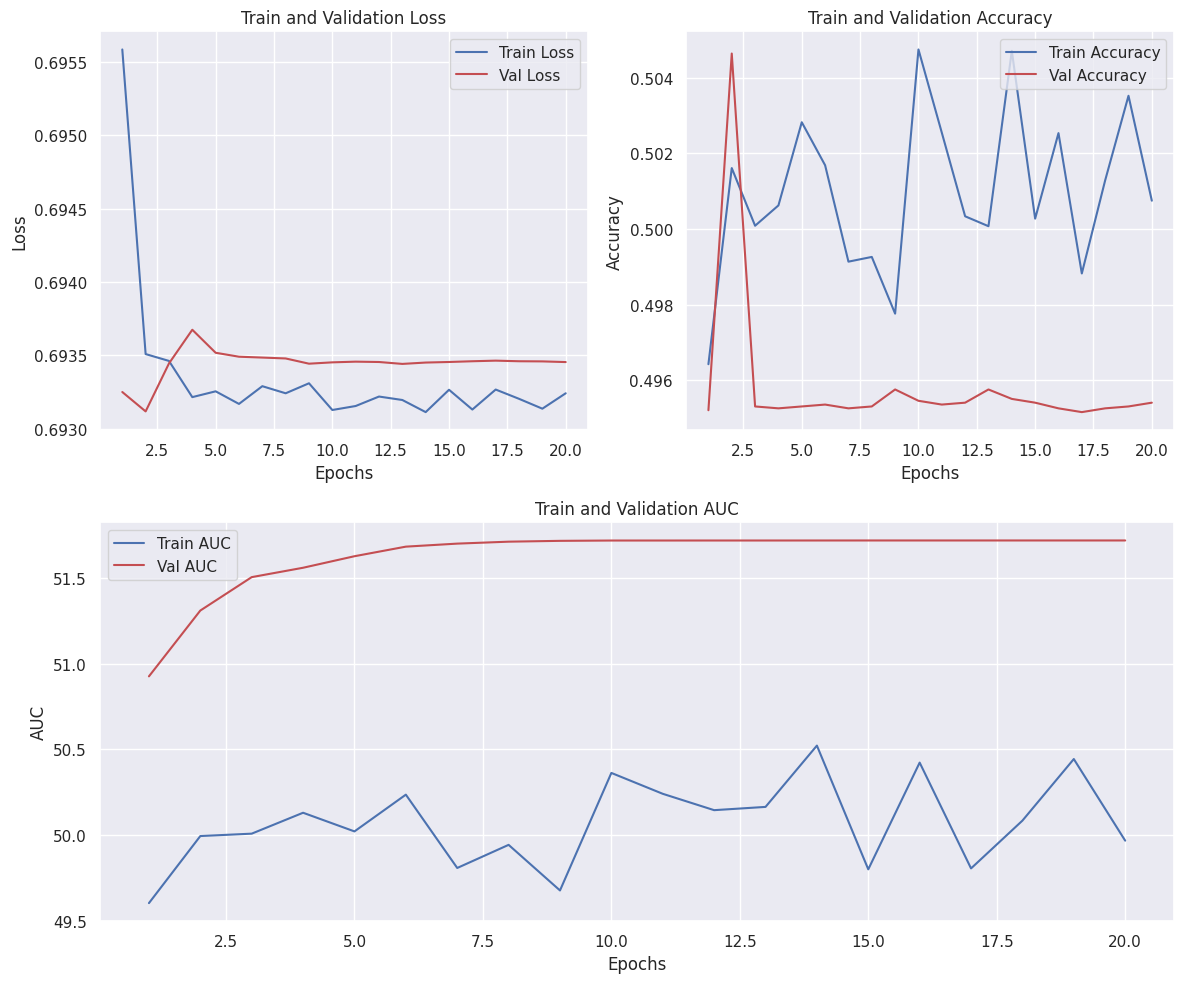

In [8]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

## Quantum with Pennylane GPU

In [9]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=10,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=True,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 6,769 trainable parameters


/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


Epoch 01: 47.25batch/s, Epoch = 28m 13s, Loss = 0.6943|0.6934, Acc = 0.501|0.495, AUC = 50.136|50.981


Epoch 02: 46.81batch/s, Epoch = 28m 29s, Loss = 0.6934|0.6931, Acc = 0.496|0.505, AUC = 49.558|51.183


Epoch 03: 46.80batch/s, Epoch = 28m 29s, Loss = 0.6933|0.6932, Acc = 0.500|0.496, AUC = 49.865|51.359


Epoch 04: 47.19batch/s, Epoch = 28m 15s, Loss = 0.6932|0.6932, Acc = 0.502|0.495, AUC = 49.737|51.352


Epoch 05: 47.22batch/s, Epoch = 28m 14s, Loss = 0.6931|0.6932, Acc = 0.501|0.495, AUC = 50.273|51.413


Epoch 06: 47.01batch/s, Epoch = 28m 21s, Loss = 0.6931|0.6931, Acc = 0.502|0.505, AUC = 50.049|51.511


Epoch 07: 46.68batch/s, Epoch = 28m 33s, Loss = 0.6932|0.6931, Acc = 0.504|0.505, AUC = 50.166|51.529


Epoch 08: 46.75batch/s, Epoch = 28m 31s, Loss = 0.6931|0.6931, Acc = 0.504|0.505, AUC = 50.288|51.545


Epoch 09: 46.92batch/s, Epoch = 28m 24s, Loss = 0.6932|0.6931, Acc = 0.499|0.504, AUC = 49.915|51.551


Epoch 10: 46.83batch/s, Epoch = 28m 28s, Loss = 0.6932|0.6931, Acc = 0.502|0.504, AUC = 49.993|51.551
TOTAL TIME = 17040.95s
BEST ACC = 0.50% AT EPOCH 2
BEST AUC = 51.55 AT EPOCH 10


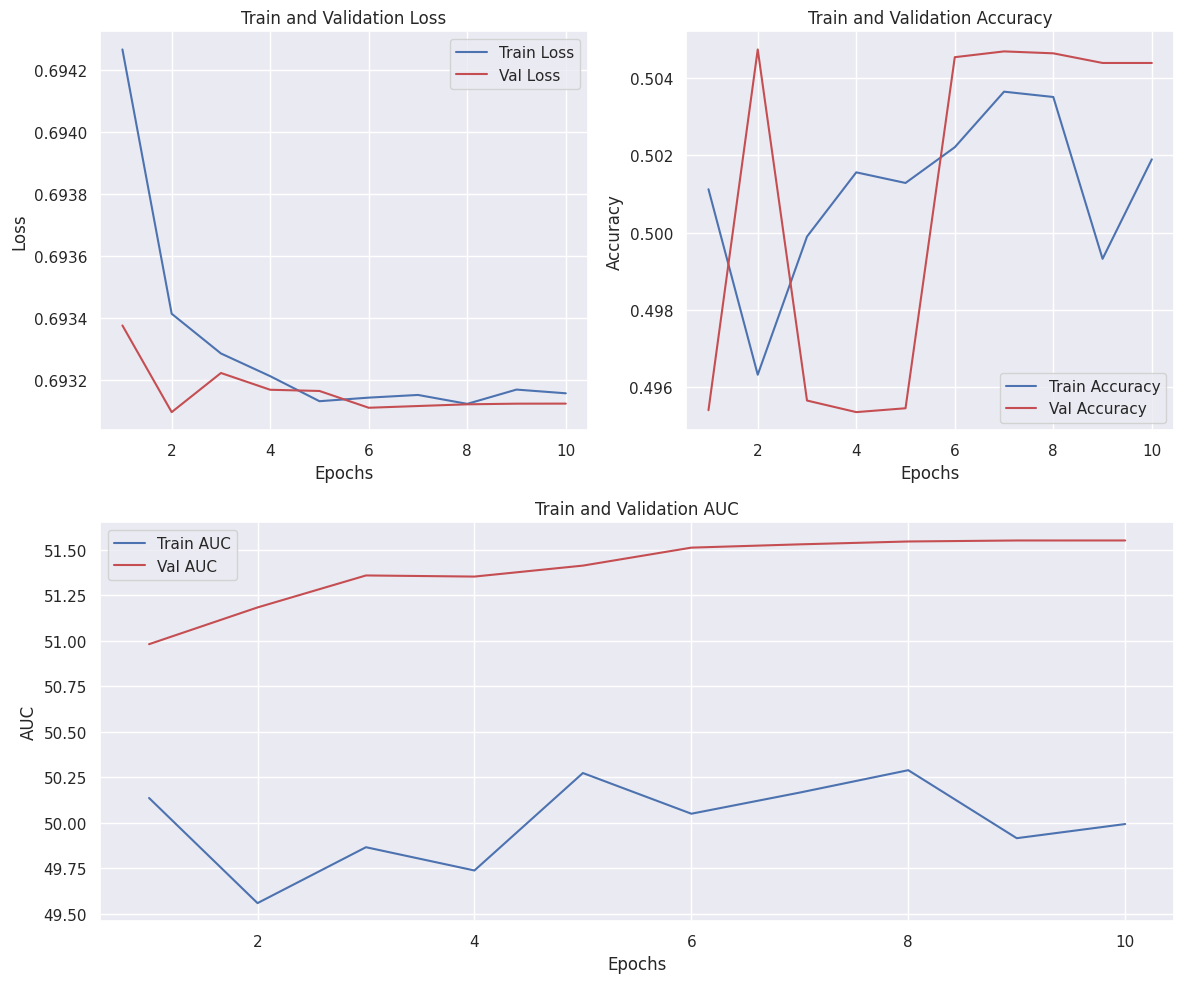

In [10]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)